In [360]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing._encoders import _BaseEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.metrics import r2_score
import seaborn as sbn
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import csv
from sklearn import tree
from tensorflow import keras
from keras import Sequential, models

In [251]:
df_train = pd.read_csv("melb_data_trial.csv", delimiter=",")

In [252]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
Suburb           50 non-null object
Address          50 non-null object
Rooms            50 non-null int64
Type             50 non-null object
Price            50 non-null int64
Method           50 non-null object
SellerG          50 non-null object
Date             50 non-null object
Distance         50 non-null float64
Postcode         50 non-null int64
Bedroom2         50 non-null int64
Bathroom         50 non-null int64
Car              50 non-null int64
Landsize         50 non-null int64
BuildingArea     29 non-null float64
YearBuilt        34 non-null float64
CouncilArea      47 non-null object
Lattitude        50 non-null float64
Longtitude       50 non-null float64
Regionname       50 non-null object
Propertycount    50 non-null int64
dtypes: float64(5), int64(8), object(8)
memory usage: 8.3+ KB


In [253]:
df_train.head() 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
1,Airport West,2/13 North St,2,u,510000,S,Nelson,22/08/2016,13.5,3042,...,1,1,141,76.0,NaN,Moonee Valley,-37.7202,144.8797,Western Metropolitan,3464
2,Altona,15 Kookaburra St,3,h,900000,S,Sweeney,28/05/2016,13.8,3018,...,1,4,697,NaN,NaN,Hobsons Bay,-37.8710,144.8075,Western Metropolitan,5301
3,Armadale,28 Cambridge St,3,h,1870000,S,Hodges,04/03/2017,6.3,3143,...,1,1,217,116.0,1888.0,Stonnington,-37.8592,145.0182,Southern Metropolitan,4836
4,Armadale,16 Llaneast St,5,h,2810000,S,Marshall,28/08/2016,6.3,3143,...,2,2,617,NaN,NaN,Stonnington,-37.8611,145.0271,Southern Metropolitan,4836


In [254]:
df_train.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea     21
YearBuilt        16
CouncilArea       3
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
dtype: int64

* CLEANING 

In [255]:
df_train["BuildingArea"].fillna(df_train.BuildingArea.mean(),inplace=True)
df_train.Car.fillna(df_train.Car.mean(),inplace=True)
df_train.YearBuilt.fillna(df_train.YearBuilt.bfill(),inplace=True)
df_train.CouncilArea.fillna(df_train.CouncilArea.ffill(),inplace=True) 

In [256]:
df_train.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [257]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
Suburb           50 non-null object
Address          50 non-null object
Rooms            50 non-null int64
Type             50 non-null object
Price            50 non-null int64
Method           50 non-null object
SellerG          50 non-null object
Date             50 non-null object
Distance         50 non-null float64
Postcode         50 non-null int64
Bedroom2         50 non-null int64
Bathroom         50 non-null int64
Car              50 non-null int64
Landsize         50 non-null int64
BuildingArea     50 non-null float64
YearBuilt        50 non-null float64
CouncilArea      50 non-null object
Lattitude        50 non-null float64
Longtitude       50 non-null float64
Regionname       50 non-null object
Propertycount    50 non-null int64
dtypes: float64(5), int64(8), object(8)
memory usage: 8.3+ KB


In [258]:
df_train

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1,94,155.482759,1888.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
1,Airport West,2/13 North St,2,u,510000,S,Nelson,22/08/2016,13.5,3042,...,1,1,141,76.000000,1888.0,Moonee Valley,-37.72020,144.87970,Western Metropolitan,3464
2,Altona,15 Kookaburra St,3,h,900000,S,Sweeney,28/05/2016,13.8,3018,...,1,4,697,155.482759,1888.0,Hobsons Bay,-37.87100,144.80750,Western Metropolitan,5301
3,Armadale,28 Cambridge St,3,h,1870000,S,Hodges,04/03/2017,6.3,3143,...,1,1,217,116.000000,1888.0,Stonnington,-37.85920,145.01820,Southern Metropolitan,4836
4,Armadale,16 Llaneast St,5,h,2810000,S,Marshall,28/08/2016,6.3,3143,...,2,2,617,155.482759,1920.0,Stonnington,-37.86110,145.02710,Southern Metropolitan,4836
5,Ascot Vale,15 Mirams St,4,h,1345000,S,Jellis,25/02/2017,5.9,3032,...,1,1,552,155.000000,1920.0,Moonee Valley,-37.77690,144.91380,Western Metropolitan,6567
6,Balwyn,2/74 Balwyn Rd,3,u,1070000,SA,Philip,03/12/2016,9.7,3103,...,2,2,206,112.000000,1998.0,Boroondara,-37.81610,145.08120,Southern Metropolitan,5682
7,Balwyn North,25 Bolinda Rd,4,h,1905000,S,Noel,03/12/2016,9.2,3104,...,2,2,647,185.000000,1955.0,Boroondara,-37.79170,145.08680,Southern Metropolitan,7809
8,Bentleigh,3/2 Scotts St,2,t,851000,S,hockingstuart,03/12/2016,13.0,3204,...,1,1,140,250.000000,1970.0,Glen Eira,-37.92040,145.04430,Southern Metropolitan,6795
9,Bentleigh East,34b Lesden St,4,t,1210000,S,hockingstuart,06/08/2016,13.9,3165,...,3,2,291,222.000000,2014.0,Glen Eira,-37.93470,145.05460,Southern Metropolitan,10969


In [259]:
df_train.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.642658,0.082453,0.062021,0.872657,0.540014,0.281282,0.483662,0.315607,-0.041125,-0.139755,0.156855,0.072069
Price,0.642658,1.000000,-0.140212,0.400622,0.630845,0.455071,0.279547,0.453178,0.445935,-0.126631,-0.380347,0.253035,-0.031139
Distance,0.082453,-0.140212,1.000000,0.138831,0.058718,0.030817,0.079605,0.594122,-0.026000,0.181423,-0.199729,0.293309,-0.292082
Postcode,0.062021,0.400622,0.138831,1.000000,0.130686,0.200461,-0.063499,0.177087,0.357481,0.197118,-0.678930,0.539667,-0.108634
Bedroom2,0.872657,0.630845,0.058718,0.130686,1.000000,0.577896,0.092223,0.444033,0.289533,-0.080020,-0.091426,0.184477,-0.000242
Bathroom,0.540014,0.455071,0.030817,0.200461,0.577896,1.000000,0.196686,0.223223,0.279566,0.136428,-0.137708,0.173160,0.173011
Car,0.281282,0.279547,0.079605,-0.063499,0.092223,0.196686,1.000000,0.292702,0.023910,0.003601,-0.167395,-0.044339,0.008098
Landsize,0.483662,0.453178,0.594122,0.177087,0.444033,0.223223,0.292702,1.000000,0.094667,-0.070868,-0.289374,0.273687,-0.347505
BuildingArea,0.315607,0.445935,-0.026000,0.357481,0.289533,0.279566,0.023910,0.094667,1.000000,0.081002,-0.378316,0.099441,0.147085
YearBuilt,-0.041125,-0.126631,0.181423,0.197118,-0.080020,0.136428,0.003601,-0.070868,0.081002,1.000000,-0.178667,0.173402,0.307864


<AxesSubplot:>

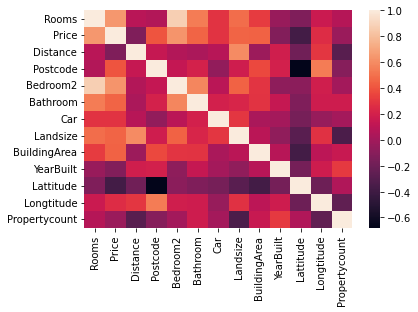

In [260]:
sns.heatmap(df_train.corr())

In [261]:
#sns.pairplot(df_train.corr())

In [262]:
df_train.corr().info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Rooms to Propertycount
Data columns (total 13 columns):
Rooms            13 non-null float64
Price            13 non-null float64
Distance         13 non-null float64
Postcode         13 non-null float64
Bedroom2         13 non-null float64
Bathroom         13 non-null float64
Car              13 non-null float64
Landsize         13 non-null float64
BuildingArea     13 non-null float64
YearBuilt        13 non-null float64
Lattitude        13 non-null float64
Longtitude       13 non-null float64
Propertycount    13 non-null float64
dtypes: float64(13)
memory usage: 1.4+ KB


######  SETTING INPUT AND TARGER

In [266]:
y = df_train.Price

In [267]:
x = pd.DataFrame(data=df_train, columns=["Rooms","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize",
                                        "BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"])

In [268]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
Rooms            50 non-null int64
Distance         50 non-null float64
Postcode         50 non-null int64
Bedroom2         50 non-null int64
Bathroom         50 non-null int64
Car              50 non-null int64
Landsize         50 non-null int64
BuildingArea     50 non-null float64
YearBuilt        50 non-null float64
Lattitude        50 non-null float64
Longtitude       50 non-null float64
Propertycount    50 non-null int64
dtypes: float64(5), int64(7)
memory usage: 4.8 KB


In [270]:
y.unique()

array([ 850000,  510000,  900000, 1870000, 2810000, 1345000, 1070000,
       1905000,  851000, 1210000,  836000, 3171000, 2500000, 1320000,
       1095000, 1075000, 2220000, 1125000, 1301000,  763000,  860000,
        582500,  720000,  775000, 1430000, 2800000, 1800000, 1291000,
        740000,  950000, 1200000, 1300000, 1000000,  875000, 1212500,
        803000, 2400000, 1480000,  515000,  528000,  880000, 2365000,
       1850000, 1530000, 2000000, 2260000, 1031000, 1350000], dtype=int64)

##### SPLITTING THE training DATA TO (TEST AND TRAIN )

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [273]:
print(len(x_train))
print(len(y_train))

40
40


In [274]:
print(len(x_test))
print(len(y_test))

10
10


In [275]:
print(x_train.shape)
print(y_train.shape)

(40, 12)
(40,)


In [276]:
print(x_test.shape)
print(y_test.shape)

(10, 12)
(10,)


##### Importing test data 

In [277]:
df_test = pd.read_csv("melb_data_trial_priceredacted.csv",delimiter=",") 

In [278]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
Suburb           50 non-null object
Address          50 non-null object
Rooms            50 non-null int64
Type             50 non-null object
Price            50 non-null object
Method           50 non-null object
SellerG          50 non-null object
Date             50 non-null object
Distance         50 non-null float64
Postcode         50 non-null int64
Bedroom2         50 non-null int64
Bathroom         50 non-null int64
Car              50 non-null int64
Landsize         50 non-null int64
BuildingArea     29 non-null float64
YearBuilt        34 non-null float64
CouncilArea      47 non-null object
Lattitude        50 non-null float64
Longtitude       50 non-null float64
Regionname       50 non-null object
Propertycount    50 non-null int64
dtypes: float64(5), int64(7), object(9)
memory usage: 8.3+ KB


In [279]:
df_test.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea     21
YearBuilt        16
CouncilArea       3
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
dtype: int64

* CLEANING 

In [280]:
df_test.BuildingArea.fillna(df_test.BuildingArea.mean(),inplace=True)
df_test.YearBuilt.fillna(df_test.YearBuilt.bfill(),inplace=True)
df_test.CouncilArea.fillna(df_test.CouncilArea.value_counts().idxmax(),inplace=True)

In [281]:
df_test.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [282]:
df_test

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,40 Federation La,3,h,,PI,Biggin,04/03/2017,2.5,3067,...,2,1,94,155.482759,1888.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
1,Airport West,2/13 North St,2,u,,S,Nelson,22/08/2016,13.5,3042,...,1,1,141,76.000000,1888.0,Moonee Valley,-37.72020,144.87970,Western Metropolitan,3464
2,Altona,15 Kookaburra St,3,h,,S,Sweeney,28/05/2016,13.8,3018,...,1,4,697,155.482759,1888.0,Hobsons Bay,-37.87100,144.80750,Western Metropolitan,5301
3,Armadale,28 Cambridge St,3,h,,S,Hodges,04/03/2017,6.3,3143,...,1,1,217,116.000000,1888.0,Stonnington,-37.85920,145.01820,Southern Metropolitan,4836
4,Armadale,16 Llaneast St,5,h,,S,Marshall,28/08/2016,6.3,3143,...,2,2,617,155.482759,1920.0,Stonnington,-37.86110,145.02710,Southern Metropolitan,4836
5,Ascot Vale,15 Mirams St,4,h,,S,Jellis,25/02/2017,5.9,3032,...,1,1,552,155.000000,1920.0,Moonee Valley,-37.77690,144.91380,Western Metropolitan,6567
6,Balwyn,2/74 Balwyn Rd,3,u,,SA,Philip,03/12/2016,9.7,3103,...,2,2,206,112.000000,1998.0,Boroondara,-37.81610,145.08120,Southern Metropolitan,5682
7,Balwyn North,25 Bolinda Rd,4,h,,S,Noel,03/12/2016,9.2,3104,...,2,2,647,185.000000,1955.0,Boroondara,-37.79170,145.08680,Southern Metropolitan,7809
8,Bentleigh,3/2 Scotts St,2,t,,S,hockingstuart,03/12/2016,13.0,3204,...,1,1,140,250.000000,1970.0,Glen Eira,-37.92040,145.04430,Southern Metropolitan,6795
9,Bentleigh East,34b Lesden St,4,t,,S,hockingstuart,06/08/2016,13.9,3165,...,3,2,291,222.000000,2014.0,Glen Eira,-37.93470,145.05460,Southern Metropolitan,10969


In [283]:
df_test.corr()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.082453,0.062021,0.872657,0.540014,0.281282,0.483662,0.315607,-0.041125,-0.139755,0.156855,0.072069
Distance,0.082453,1.000000,0.138831,0.058718,0.030817,0.079605,0.594122,-0.026000,0.181423,-0.199729,0.293309,-0.292082
Postcode,0.062021,0.138831,1.000000,0.130686,0.200461,-0.063499,0.177087,0.357481,0.197118,-0.678930,0.539667,-0.108634
Bedroom2,0.872657,0.058718,0.130686,1.000000,0.577896,0.092223,0.444033,0.289533,-0.080020,-0.091426,0.184477,-0.000242
Bathroom,0.540014,0.030817,0.200461,0.577896,1.000000,0.196686,0.223223,0.279566,0.136428,-0.137708,0.173160,0.173011
Car,0.281282,0.079605,-0.063499,0.092223,0.196686,1.000000,0.292702,0.023910,0.003601,-0.167395,-0.044339,0.008098
Landsize,0.483662,0.594122,0.177087,0.444033,0.223223,0.292702,1.000000,0.094667,-0.070868,-0.289374,0.273687,-0.347505
BuildingArea,0.315607,-0.026000,0.357481,0.289533,0.279566,0.023910,0.094667,1.000000,0.081002,-0.378316,0.099441,0.147085
YearBuilt,-0.041125,0.181423,0.197118,-0.080020,0.136428,0.003601,-0.070868,0.081002,1.000000,-0.178667,0.173402,0.307864
Lattitude,-0.139755,-0.199729,-0.678930,-0.091426,-0.137708,-0.167395,-0.289374,-0.378316,-0.178667,1.000000,-0.212652,0.054225


In [284]:
x_sample = pd.DataFrame(data=df_test, columns=["Rooms","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize",
                                        "BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"])

In [285]:
x_sample.isnull().sum()

Rooms            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

##### IMPORTING MODEL
* Linear Regression

In [286]:
from sklearn.linear_model import LinearRegression

In [287]:
model = LinearRegression()

In [288]:
model.fit(x_train,y_train)

LinearRegression()

In [289]:
model.intercept_

-262224722.6206937

In [290]:
model.coef_

array([ 1.91675212e+05, -5.98809584e+04,  1.51806565e+03,  1.35747606e+05,
        2.85928644e+04,  4.61361821e+04,  1.12690734e+03,  2.48988996e+03,
       -1.70162075e+03, -1.46444452e+06,  1.41568037e+06,  3.17428588e+00])

In [291]:
y1_pred = model.predict(x_sample)
y1_pred

array([1280963.04935935, -196635.85746306, 1163718.7208963 ,
       1304479.68799245, 2544055.16652203, 1644691.27926317,
        934112.77776578, 2023839.00581807,  908588.62956348,
       1492258.4583399 ,  938645.34514576, 2681525.57106179,
       2312616.51230299, 1535706.55012903, 1243897.961721  ,
       1156708.71673414, 2098962.45853049, 1529746.02908546,
       1317087.3206588 ,  579585.09839237,  736760.17617401,
        632812.12012741,  601076.16885692,  915763.60566154,
       1727774.50287011, 2443881.55111995, 2206270.334328  ,
       1250663.35901025,  798128.28090498, 1070980.7401658 ,
       2066560.66890505, 1327687.52943441, 1456651.32114488,
       1396306.51507145,  865347.18405125, 1117434.38729012,
       1513409.54165775,  780736.53748584, 1643831.06738827,
       1886774.50020498,  382764.55789575,  504487.34693357,
       1492199.05194286, 1917891.50689179, 1453986.33753517,
       1872251.69433734, 2112941.39754814, 2334311.24072486,
       1873836.39910391,

In [385]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

* Finding the mean Square 
* this is the process of checking different between predicted data and real data 
* The large the mse the less the accuracy of the prediction hence the model deployed.

In [388]:
def metrics(y,y1_pred):
    print("Accuracy on training data :", r2_score(y,y1_pred))
    print("Mean Square error :", mean_squared_error(y,y1_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y1_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y1_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y1_pred))
    return None 
    

In [389]:
metrics(y,y1_pred)

Accuracy on training data : 0.7185524484313041
Mean Square error : 119857648337.61705
Root Mean Square error : 346204.6336166185
Mean Absolute percentage error : 0.23004388487808952
Mean Absolute error : 268112.5129904902


<AxesSubplot:xlabel='Price'>

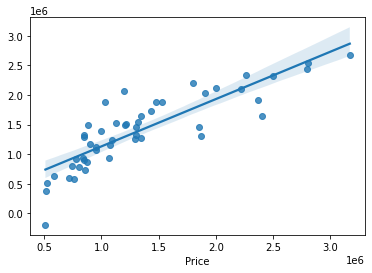

In [645]:
sns.regplot(data=df_train, x="Price", y=y1_pred, marker="o")

* Training accuracy of the regression model 

In [295]:
model.score(x_train,y_train)

0.7992941603455603

* Validaction Accuracy 

In [296]:
model.score(x_test,y_test)

0.1785219120507977

* Checking through our result we can see the mse is too large also the validation accuracy is very bad
* This mean Linear regression dont work perfectly with that data
* Reason:
    Linear regression work better on 1 feature not multiple feature of data.
    Also, We cant use one feature of data as their we be feature bias as we need to closely consider other data feature.
    Hence, mutliple feature need to be consider.
    
* Think of linear model that allows multiple feature. then deploy it to the data.


##### Model 2

In [297]:
from sklearn.ensemble import RandomForestRegressor

In [298]:
model_2 = RandomForestRegressor()

In [299]:
model_2.fit(x_train,y_train)

RandomForestRegressor()

In [300]:
y2_pred = model.predict(x_sample)
y2_pred

array([1280963.04935935, -196635.85746306, 1163718.7208963 ,
       1304479.68799245, 2544055.16652203, 1644691.27926317,
        934112.77776578, 2023839.00581807,  908588.62956348,
       1492258.4583399 ,  938645.34514576, 2681525.57106179,
       2312616.51230299, 1535706.55012903, 1243897.961721  ,
       1156708.71673414, 2098962.45853049, 1529746.02908546,
       1317087.3206588 ,  579585.09839237,  736760.17617401,
        632812.12012741,  601076.16885692,  915763.60566154,
       1727774.50287011, 2443881.55111995, 2206270.334328  ,
       1250663.35901025,  798128.28090498, 1070980.7401658 ,
       2066560.66890505, 1327687.52943441, 1456651.32114488,
       1396306.51507145,  865347.18405125, 1117434.38729012,
       1513409.54165775,  780736.53748584, 1643831.06738827,
       1886774.50020498,  382764.55789575,  504487.34693357,
       1492199.05194286, 1917891.50689179, 1453986.33753517,
       1872251.69433734, 2112941.39754814, 2334311.24072486,
       1873836.39910391,

In [390]:
def metrics2(y,y2_pred):
    print("Accuracy on training data :", r2_score(y,y2_pred))
    print("Mean Square error :", mean_squared_error(y,y2_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y2_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y2_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y2_pred))
    return None 

<AxesSubplot:xlabel='Price'>

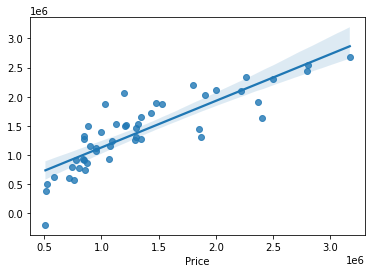

In [644]:
sns.regplot(data=df_train, x="Price", y=y2_pred, marker="o")

In [391]:
metrics2(y,y2_pred)

Accuracy on training data : 0.7185524484313041
Mean Square error : 119857648337.61705
Root Mean Square error : 346204.6336166185
Mean Absolute percentage error : 0.23004388487808952
Mean Absolute error : 268112.5129904902


##### Model 3

In [310]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [311]:
model_3 = GradientBoostingRegressor()

In [312]:
model_3.fit(x_train,y_train)

GradientBoostingRegressor()

In [313]:
y3_pred = model_3.predict(x_sample)
y3_pred

array([ 863437.39041258,  508955.26108916,  903410.94158146,
       1844983.91073043, 2813789.37093003, 1350894.16187918,
       1066032.06377486, 1898919.51785007,  854063.21864211,
       1207525.72147831,  845882.47101067, 3163981.20682143,
       2507149.29246065, 1315548.24337353, 1093388.44642845,
       1079945.97047621, 2212861.41760224, 1258713.42661058,
       1294744.86806929,  786753.15442875,  860233.00698075,
        593157.70686433,  718671.92622054,  779361.38154782,
       1426861.46634132, 2288661.80743266, 1840224.26251066,
       1276280.25602915,  740145.74419435,  957094.20598587,
       2079328.85574423,  856788.64538618, 1071581.1445888 ,
       1000277.81929191,  866217.69902108,  936273.9316384 ,
       1218022.69942626,  806235.73312701, 2383808.11784968,
       1799679.08682402,  519734.94201071,  531628.5964149 ,
        891837.85657886, 2355608.53920702, 1842549.30328089,
       2079682.00124698, 2001997.60698482, 2259901.90633578,
       1818835.32969961,

<AxesSubplot:xlabel='Price'>

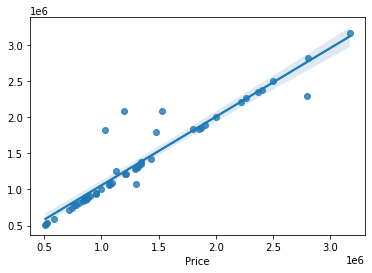

In [643]:
sns.regplot(data=df_train, x="Price", y=y3_pred, marker="o")

In [425]:
def metrics3(y,y3_pred):
    print("Accuracy on training data :", r2_score(y,y3_pred))
    print("Mean Square error :", mean_squared_error(y,y3_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y3_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y3_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y3_pred))
    return None 

In [426]:
metrics3(y,y3_pred)

Accuracy on training data : 0.8997270856743892
Mean Square error : 42702363676.784676
Root Mean Square error : 206645.50243541395
Mean Absolute percentage error : 0.05683496926041575
Mean Absolute error : 74985.87604267309


##### MODEL 4
* DECISION TREE REGRESSOR

In [325]:
from sklearn.tree import DecisionTreeRegressor

In [326]:
model_4 = DecisionTreeRegressor()

In [327]:
model_4.fit(x_train,y_train)

DecisionTreeRegressor()

In [333]:
y4_pred = model.predict(x_sample)
y4_pred

array([1280963.04935935, -196635.85746306, 1163718.7208963 ,
       1304479.68799245, 2544055.16652203, 1644691.27926317,
        934112.77776578, 2023839.00581807,  908588.62956348,
       1492258.4583399 ,  938645.34514576, 2681525.57106179,
       2312616.51230299, 1535706.55012903, 1243897.961721  ,
       1156708.71673414, 2098962.45853049, 1529746.02908546,
       1317087.3206588 ,  579585.09839237,  736760.17617401,
        632812.12012741,  601076.16885692,  915763.60566154,
       1727774.50287011, 2443881.55111995, 2206270.334328  ,
       1250663.35901025,  798128.28090498, 1070980.7401658 ,
       2066560.66890505, 1327687.52943441, 1456651.32114488,
       1396306.51507145,  865347.18405125, 1117434.38729012,
       1513409.54165775,  780736.53748584, 1643831.06738827,
       1886774.50020498,  382764.55789575,  504487.34693357,
       1492199.05194286, 1917891.50689179, 1453986.33753517,
       1872251.69433734, 2112941.39754814, 2334311.24072486,
       1873836.39910391,

In [394]:
def metrics4(y,y4_pred):
    print("Accuracy on training data :", r2_score(y,y4_pred))
    print("Mean Square error :", mean_squared_error(y,y4_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y4_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y4_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y4_pred))
    return None 

In [395]:
metrics4(y,y4_pred)

Accuracy on training data : 0.7185524484313041
Mean Square error : 119857648337.61705
Root Mean Square error : 346204.6336166185
Mean Absolute percentage error : 0.23004388487808952
Mean Absolute error : 268112.5129904902


<AxesSubplot:xlabel='Price'>

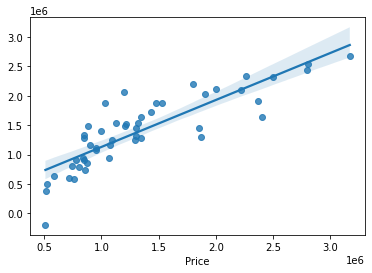

In [646]:
sns.regplot(data=df_train, x="Price", y=y4_pred, marker="o")

##### Model 5
* ElasticNet 

In [396]:
from sklearn.linear_model import ElasticNet

In [397]:
model_5 = ElasticNet()

In [398]:
model_5.fit(x_train,y_train)

ElasticNet()

In [400]:
y5_pred = model_5.predict(x_sample)
y5_pred

array([1188115.67072345,  -20396.39333895, 1247920.87940928,
       1227354.85512844, 2366620.29995225, 1638114.99786881,
        785685.41184076, 1941316.08920422, 1004930.08287212,
       1321168.23687208,  769823.42114374, 2715281.99091799,
       2195522.53759074, 1418477.933137  , 1335205.15553717,
       1157538.38710076, 2146472.11472134, 1502943.25614702,
       1214611.49959963,  573175.09313227,  741690.44917755,
        751599.67650027,  708227.08366174,  821856.30534932,
       1777488.07206937, 2554707.87372201, 2160464.33571262,
       1310562.65257993,  838052.99678667,  939809.76762245,
       2001033.76900981, 1510424.69483401, 1324075.36569535,
       1291499.47633054, 1212610.93493617, 1036107.25911278,
       1382027.63587367,  895012.15391102, 1740364.76570828,
       1531760.23082475,  658068.70521795,  621198.30819561,
       1566458.22688816, 1783610.91215328, 1128065.90274525,
       1644129.98616955, 2101644.07794296, 2391704.02049348,
       1655344.17149667,

In [401]:
def metrics5(y,y5_pred):
    print("Accuracy on training data :", r2_score(y,y5_pred))
    print("Mean Square error :", mean_squared_error(y,y5_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y5_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y5_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y5_pred))
    return None 

In [402]:
metrics5(y,y5_pred)

Accuracy on training data : 0.7264613112532001
Mean Square error : 116489568943.8764
Root Mean Square error : 341305.682554329
Mean Absolute percentage error : 0.22429025820214146
Mean Absolute error : 260851.90949116164


<AxesSubplot:xlabel='Price'>

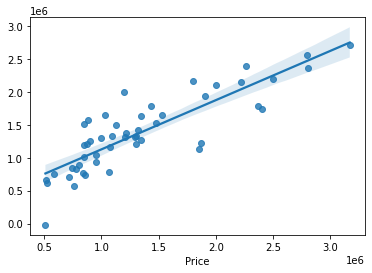

In [647]:
sns.regplot(data=df_train, x="Price", y=y5_pred, marker="o")

#### model 6
* AdaboostGradient

In [403]:
from sklearn.ensemble import AdaBoostRegressor

In [404]:
model_6 = AdaBoostRegressor() 

In [405]:
model_6.fit(x_train,y_train) 

AdaBoostRegressor()

In [410]:
y6_pred=model_6.predict(x_sample)
y6_pred

array([1040956.52173913,  864033.33333333,  932500.        ,
       1725000.        , 2473636.36363636, 1156416.66666667,
       1109153.84615385, 1905000.        ,  984333.33333333,
       1202807.69230769, 1005900.        , 3171000.        ,
       2500000.        , 1231142.85714286, 1026535.71428571,
       1060666.66666667, 2105588.23529412, 1106071.42857143,
       1150666.66666667,  899888.88888889, 1081714.28571429,
        852666.66666667,  864033.33333333,  929208.33333333,
       1430000.        , 2194444.44444444, 1778333.33333333,
       1025125.        ,  926190.47619048, 1014047.61904762,
       2135000.        ,  979192.30769231, 1153428.57142857,
       1105000.        ,  961214.28571429,  941357.14285714,
       1212500.        ,  994142.85714286, 2121000.        ,
       1928888.88888889,  717947.36842105,  777000.        ,
       1014047.61904762, 2155000.        , 1828571.42857143,
       2053750.        , 1928888.88888889, 2105588.23529412,
       2058333.33333333,

In [411]:
def metrics6(y,y6_pred):
    print("Accuracy on training data :", r2_score(y,y6_pred))
    print("Mean Square error :", mean_squared_error(y,y6_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y6_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y6_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y6_pred))
    return None

In [412]:
metrics6(y,y6_pred)

Accuracy on training data : 0.8170053620062628
Mean Square error : 77930352728.50609
Root Mean Square error : 279160.08441126766
Mean Absolute percentage error : 0.17372639965796047
Mean Absolute error : 184597.4792383698


<AxesSubplot:xlabel='Price'>

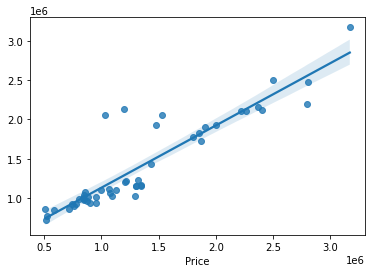

In [648]:
sns.regplot(data=df_train, x="Price", y=y6_pred, marker="o")

##### Model 7
* Lasso 

In [413]:
from sklearn.linear_model import Lasso

In [414]:
model_7 = Lasso()

In [415]:
model_7.fit(x_train,y_train)

Lasso()

In [417]:
y7_pred = model_7.predict(x_sample)
y7_pred

array([1280937.63950568, -196591.71778375, 1163709.20854652,
       1304456.41478336, 2544047.49866241, 1644694.57854226,
        934089.57791409, 2023839.69488439,  908575.97711214,
       1492219.51506591,  938628.70814735, 2681553.80185208,
       2312608.17185974, 1535697.57886958, 1243911.86594555,
       1156709.36885154, 2098934.15251169, 1529701.2497113 ,
       1317046.07959631,  579596.86760947,  736732.33958071,
        632821.19823337,  601132.13930732,  915780.33043551,
       1727769.40687951, 2443860.73333359, 2206300.49433622,
       1250654.96157712,  798134.43511683, 1070936.95779809,
       2066516.48021013, 1327754.6164313 , 1456659.58160874,
       1396247.81282848,  865428.59527156, 1117452.05773151,
       1513416.34856227,  780746.74458361, 1643837.84425479,
       1886669.23470053,  382751.7126289 ,  504550.4354589 ,
       1492203.93286318, 1917882.22537568, 1453907.11564001,
       1872221.33616632, 2112973.92418736, 2334333.88984197,
       1873752.08139685,

In [421]:
def metrics7(y,y7_pred):
    print("Accuracy on training data :", r2_score(y,y7_pred))
    print("Mean Square error :", mean_squared_error(y,y7_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y7_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y7_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y7_pred))
    return None

In [422]:
metrics7(y,y7_pred)

Accuracy on training data : 0.7185678328908166
Mean Square error : 119851096690.1508
Root Mean Square error : 346195.17138479964
Mean Absolute percentage error : 0.23003346284884235
Mean Absolute error : 268105.110605408


<AxesSubplot:xlabel='Price'>

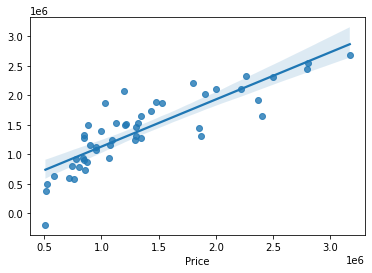

In [649]:
sns.regplot(data=df_train, x="Price", y=y7_pred, marker="o")

* MODEL 3 i.e GradientBoostingRegressor have the best outcome so far with the feature selected. 

###### NEURAL NETOWRK 
* MODEL 8

In [555]:
import keras
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Optimizer 

In [556]:
model_8 = Sequential()

In [557]:
model_8.add(Dense(units=34, activation="relu", input_shape=(12,)))
model_8.add(Dropout(0.8))
model_8.add(Dense(units=15, activation="relu"))
model_8.add(Dense(units=15, activation="relu"))
model_8.add(Dropout(0.5))
model_8.add(Dense(units=15, activation="relu"))
model_8.add(Dense(units=1,activation="relu")) 
model_8.compile(loss="mean_squared_logarithmic_error",optimizer="nadam", metrics=["mse"])
history=model_8.fit(x_train,y_train,epochs=20,batch_size=16, validation_split=0.25,validation_data=(x_test,y_test))

Epoch 1/20
2/2 [==============================] - 2s 271ms/step - loss: 89.8602 - mse: 2346547937280.0000 - val_loss: 60.6696 - val_mse: 1736955920384.0000
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 127.8914 - mse: 2346680582144.0000 - val_loss: 59.9038 - val_mse: 1736898772992.0000
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 88.9585 - mse: 2344966946816.0000 - val_loss: 58.7491 - val_mse: 1736796667904.0000
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 86.4558 - mse: 2346421846016.0000 - val_loss: 57.6675 - val_mse: 1736694956032.0000
Epoch 5/20
2/2 [==============================] - 0s 41ms/step - loss: 86.2370 - mse: 2345866362880.0000 - val_loss: 56.2941 - val_mse: 1736549728256.0000
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 103.8899 - mse: 2345842245632.0000 - val_loss: 55.3229 - val_mse: 1736443035648.0000
Epoch 7/20
2/2 [==============================] - 0s 58ms/step - lo

In [558]:
mse = history.history["mse"]
val_mse = history.history["val_mse"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [559]:
def plot_graph(validation_data, training_data, graph_type):
    plt.clf()
    epochs = range(1, len(training_data) + 1)
    plt.plot(epochs, training_data, 'r', label='Training '+graph_type)
    plt.plot(epochs, validation_data, 'b', label='Validation '+graph_type)
    plt.title('Training and validation '+graph_type)
    plt.xlabel('Epochs')
    plt.ylabel(graph_type)
    plt.legend()
    plt.show()

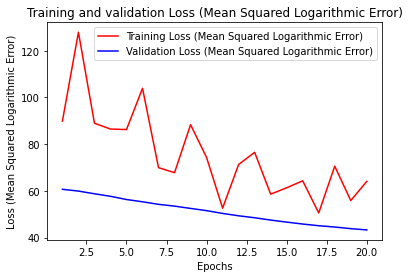

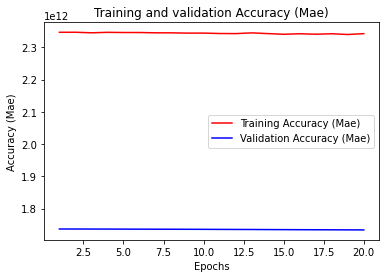

In [560]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss (Mean Squared Logarithmic Error)')
plot_graph(history['val_mse'], history['mse'], 'Accuracy (Mae)')

In [650]:
y8_pred = model_8.predict(x_sample)
y8_pred

array([[1100.3938 ],
       [ 931.5211 ],
       [1433.5759 ],
       [1307.9369 ],
       [1318.6569 ],
       [1722.7775 ],
       [1500.8859 ],
       [1953.8584 ],
       [1725.2509 ],
       [2411.2012 ],
       [1244.0116 ],
       [2422.6309 ],
       [1824.4567 ],
       [2525.5635 ],
       [1802.9724 ],
       [1215.3889 ],
       [2126.7961 ],
       [1945.4562 ],
       [ 945.5903 ],
       [2395.433  ],
       [1222.5366 ],
       [2065.9795 ],
       [2106.185  ],
       [1844.7755 ],
       [2325.1824 ],
       [1486.8038 ],
       [2473.9663 ],
       [1411.9768 ],
       [1053.4545 ],
       [2063.1763 ],
       [ 627.4829 ],
       [ 520.7878 ],
       [2434.4167 ],
       [ 989.6359 ],
       [2031.1586 ],
       [2966.3418 ],
       [3007.6287 ],
       [2992.094  ],
       [1839.9928 ],
       [1901.8314 ],
       [3304.8428 ],
       [2393.9697 ],
       [1896.6593 ],
       [ 457.53156],
       [3456.534  ],
       [1471.0376 ],
       [2763.286  ],
       [1558.

In [655]:
def metrics8(y,y8_pred):
    print("Accuracy on training data :", r2_score(y,y8_pred))
    print("Mean Square error :", mean_squared_error(y,y8_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y8_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y8_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y8_pred))
    return None

In [657]:
metrics8(y,y8_pred)

Accuracy on training data : -4.211754586503582
Mean Square error : 2219485104664.8364
Root Mean Square error : 1489793.64499411
Mean Absolute percentage error : 0.9983015682799187
Mean Absolute error : 1339263.3166186523


<AxesSubplot:xlabel='Price'>

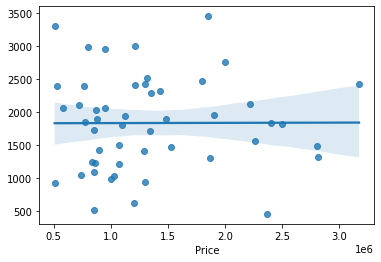

In [651]:
sns.regplot(data=df_train, x="Price", y=y8_pred, marker="o")

##### Data Augmentation

In [563]:
import imblearn
from imblearn.over_sampling import SMOTE

In [572]:
sm = SMOTE(random_state=42) 
x_train_res, y_train_res = sm.fit_resample(x, y.ravel())

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [573]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [574]:
model_9 = HistGradientBoostingRegressor()

In [575]:
model_9.fit(x_train,y_train)

HistGradientBoostingRegressor()

In [577]:
y9_pred = model_9.predict(x_sample)
y9_pred

array([ 910167.5940564 ,  595480.81081787, 1277238.45985718,
       1490763.69569336, 2172521.34473267, 1317547.49044678,
        836119.25665527, 1376201.30663208, 1043374.75886841,
       1317752.51151734, 1317752.51151734, 1626169.56113281,
       1725132.40790772,  910167.5940564 , 1317547.49044678,
        969121.40039673, 2172521.34473267, 1583456.80884522,
       1725132.40790772,  777465.44046997,  910167.5940564 ,
       1259098.69533203, 1051843.1931189 , 1184545.34670532,
       1857834.56149414, 1758871.71471924, 1690888.08987061,
       1317547.49044678, 1277238.45985718, 1043374.75886841,
       1583456.80884522, 1144536.30627075, 1150806.0398938 ,
       1725132.40790772, 1259098.69533203,  462778.65723145,
       1150806.0398938 , 1259098.69533203, 2039819.19114624,
       1725132.40790772,  870158.55362183, 1101823.55398316,
       1490763.69569336, 1857834.56149414,  910167.5940564 ,
       1857834.56149414, 2073558.49795776, 1391800.84891846,
       1450754.65525879,

In [578]:
def metrics9(y,y9_pred):
    print("Accuracy on training data :", r2_score(y,y9_pred))
    print("Mean Square error :", mean_squared_error(y,y9_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y9_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y9_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y9_pred))
    return None

In [579]:
metrics9(y,y9_pred)

Accuracy on training data : 0.4342303847347644
Mean Square error : 240939440434.3146
Root Mean Square error : 490855.82448853005
Mean Absolute percentage error : 0.328849829660955
Mean Absolute error : 390278.0261386477


<AxesSubplot:xlabel='Price'>

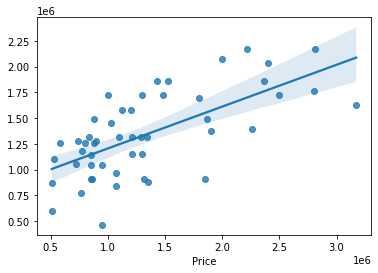

In [652]:
sns.regplot(data=df_train, x="Price", y=y9_pred, marker="o")

In [580]:
from sklearn.neighbors import KNeighborsRegressor

In [581]:
model_10 = KNeighborsRegressor()

In [582]:
model_10.fit(x_train,y_train)

KNeighborsRegressor()

In [596]:
y10_pred = model_10.predict(x_sample)
y10_pred

array([ 792000.,  880200., 1588200., 1533400., 1576400., 1638200.,
       1478200., 1411000., 1638200., 1537800., 1490200., 1537800.,
       1638200., 1667800., 1524200., 1490200., 1069500., 1411000.,
        880200., 1537800., 1098200., 1069500., 1069500., 1411000.,
       1537800., 1666200., 1537800., 1588200.,  880200., 1069500.,
       1205200., 1205200., 1537800.,  880200., 1069500., 1096100.,
       1096100., 1096100., 1524200., 1735000., 1066100., 1537800.,
       1411000., 1205200., 1066100., 1666200., 1235100., 1373200.,
        925200., 1537800.])

In [585]:
def metrics10(y,y10_pred):
    print("Accuracy on training data :", r2_score(y,y10_pred))
    print("Mean Square error :", mean_squared_error(y,y10_pred,squared=True))
    print("Root Mean Square error :", mean_squared_error(y,y10_pred,squared=False))
    print("Mean Absolute percentage error :",mean_absolute_percentage_error(y,y10_pred) )
    print("Mean Absolute error :", mean_absolute_error(y,y10_pred))
    return None

In [586]:
metrics10(y,y10_pred)

Accuracy on training data : 0.13261645361612961
Mean Square error : 369385171400.0
Root Mean Square error : 607770.6569093312
Mean Absolute percentage error : 0.40646748102000174
Mean Absolute error : 489158.0


<AxesSubplot:xlabel='Price'>

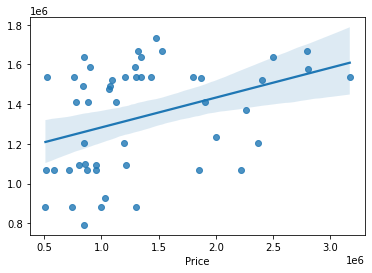

In [661]:
sns.regplot(data=df_train, x="Price", y=y10_pred, marker="o")

In [ ]:
g = sns.FacetGrid(df_train, row="BuildingArea", col="Price", margin_titles=True)
g.map(sns.regplot, "Rooms", "Price", color=".3", fit_reg=False, x_jitter=.1)

In [380]:
# def run_regression_with_k_value(regression_model, k='all'):
#     kBest = SelectKBest(score_func=mutual_info_regression, k=k)
#     pipeline = Pipeline([ ('kBest', kBest),('model', regression_model)])
#     result = pipeline.fit(x_train, y_train,k ="all")
#     predict_train = pipeline.predict(x_train)  
#     print("Prediction score on training data is ", r2_score(y_train, predict_train))
#     print("RMSE on training data is ", mean_squared_error(y_train, predict_train, squared=False))
#     print("MSE on training data is ", mean_squared_error(y_train, predict_train, squared=True))
#     print("Mae on training data is ", mean_absolute_error(y_train, predict_train))
#     print("Mape on training data is ", mean_absolute_percentage_error(y_train, predict_train))
#     predict_test = pipeline.predict(x_sample)
#     filename = str(type(regression_model))+"prediction.csv"
#     with (open(filename, 'w')) as file:
#         writer = csv.writer(file)
#         writer.writerow(['Id', 'SalePrice'])
#         for index, val in enumerate(predict_test):
#             writer.writerow([(1461+index), val])
#     return result['kBest'], result['model']

In [381]:
# regression_kbest, regression_model =  run_regression_with_k_value(LinearRegression())